<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250702_Python_ML_Class02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
資料準備好, 越齊全越好
age age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol
s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level
```

```

```



In [453]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(scaled = False)

df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
df["y"] = diabetes["target"]
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [454]:
load_diabetes(scaled = False)

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
        [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
        [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
        ...,
        [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
        [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
        [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51

In [455]:
from sklearn.model_selection import train_test_split

x = df.drop(["y"], axis = 1)
y = df["y"]

# 90%x / 10%x, 90%y / 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [456]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 4) # max_depth = 5 過擬合
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.8333333333333334, 's5 <= 4.783\nsquared_error = 6042.153\nsamples = 397\nvalue = 153.715'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3980.489\nsamples = 240\nvalue = 120.833'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'bp <= 112.335\nsquared_error = 5014.286\nsamples = 157\nvalue = 203.981'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

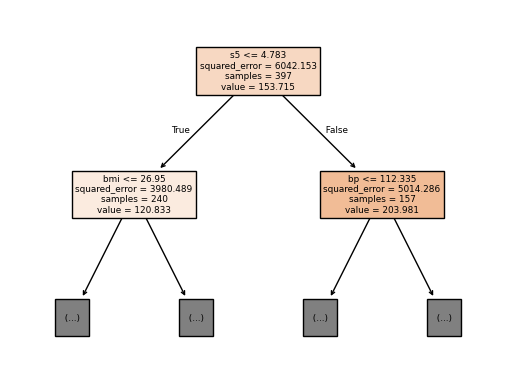

In [457]:
from sklearn.tree import plot_tree
plot_tree(reg,
          max_depth = 1,
          feature_names = diabetes["feature_names"],
          filled = True)

```
東西越聚集，猜錯機率越低(-1 / 0<平均值> / 1)
東西越分散，猜錯機率越高(-10 / 0<平均值> / 10)
回歸的Gini係數: MSE(均方誤差)
MSE -> 每個點和平均的平均距離
```

MSE: $ \frac{1}{h} Σ (y_i - \mu) ^2 $

```
metrics特點: 一致性
```

```
大型語言模型: 全部都記得(過擬合?)
```



$ pre_i $: 預測值  $ y_i $: 正確值

MSE: $ \frac{1}{h} Σ (pre_i - y_i) ^2 $

RMSE: $ \sqrt{\frac{1}{h} Σ (pre_i - y_i) ^2} $

MAE: $ \frac{1}{h} Σ |pre_i - y_i| $
```
RMSE、MSE、MAE: 會把忽大忽小的情況的誤差放得很大，就會知道哪種猜測比較不好(有極端值會很明顯)
上述統計參數: 日常生活溝通很直覺好用, 評估模型好壞不好用(因為需要一致的標準，看場合的好壞)

```



回歸的metrics: 習慣用 $ r^2 $ score (0~1)

(因為 $ r^2 $ score 是一個一致的度量)

認真猜的誤差:
a = $ \frac{1}{h} Σ (pre_i - y_i) ^2 $ (資料點/正確值)


瞎猜的誤差:
b = $ \frac{1}{h} Σ (μ - y_i) ^2 $ (平均值/正確值)

a/b? -> 0(爛)~1(好)之間, 0.5以上就不錯


In [458]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print(pre)

r2_score(y_test, pre)

[112.22222222 115.89690722  85.0617284  172.16666667 182.03076923
 266.12       231.6         85.0617284  115.89690722 115.89690722
 266.12       163.25       182.03076923 182.03076923  85.0617284
 182.03076923 172.16666667 231.6        266.12       115.89690722
 231.6        182.03076923 115.89690722 115.89690722 231.6
 266.12       115.89690722 172.16666667 231.6        182.03076923
 115.89690722 172.16666667  85.0617284  182.03076923  85.0617284
  85.0617284   85.0617284   85.0617284  115.89690722 266.12
 115.89690722 115.89690722 172.16666667 272.33333333  85.0617284 ]


0.5081858942158592

```
r^2 還不夠好？
1. 資料筆數太少
2. 資料縱向(資料本身與問題的關聯性)太少
-> 要給更多種資料
```

